In [414]:
import pandas as pd

#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [415]:
#Amado's csv to df 

df_comments = pd.read_csv('/Users/amadouyehara/Desktop/Spring 2024/Applied Analytics & Predictive Modeling/Project 1/opiates_comments6_LIWC.csv')
df_submissions = pd.read_csv('/Users/amadouyehara/Desktop/Spring 2024/Applied Analytics & Predictive Modeling/Project 1/opiates_submissions6_LIWC.csv', low_memory=False)


In [416]:
#Kaily's 

#df_comments = pd.read_csv("C:/Users/Kaily Mejia/Dropbox/Graduate Courses/Applied and Predictive Modeling/Final Project/opiates_comments6_LIWC.csv" )
#df_submissions = pd.read_csv('C:/Users/Kaily Mejia/Dropbox/Graduate Courses/Applied and Predictive Modeling/Final Project/opiates_submissions6_LIWC.csv', low_memory = False)


In [417]:
#Structure of Comments dataset
df_comments.head()

,author,created_utc,score,subreddit,WC,Analytic,Clout,Authentic,Tone,WPS,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,BoofDontShoot,1659067065,1,opiates,5,8.69,50.00,1.00,25.77,2.50,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
1,Busy_Background_195,1659067044,1,opiates,55,32.58,13.76,14.10,1.00,13.75,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5.45,3.64,0.0
2,Wolf_Double,1659066949,1,opiates,6,1.00,95.20,23.51,99.00,6.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
3,Knowagoraaa,1659066905,1,opiates,39,71.92,60.13,99.00,73.64,13.00,...,0.0,0.0,0.0,0.0,0.0,2.56,0.00,5.13,0.00,0.0
4,Busy_Background_195,1659066875,1,opiates,75,24.37,29.68,14.56,2.41,25.00,...,0.0,0.0,0.0,0.0,0.0,0.00,2.67,4.00,0.00,0.0


In [418]:
#Structure of Submissions dataset
df_submissions.head()

,author,title,created_utc,score,subreddit,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Odd-Pizza-1079,How much tylenol is too much? Asking for a fri...,1.659067e+09,1,opiates,12.0,18.82,79.76,1.79,25.77,...,0.0,0.0,0.00,8.33,0.00,0.00,0.0,0.0,16.67,0.00
1,Global_Face_4708,Gabapentin/Lyrica/Clonidine Through Telehealth?,1.659065e+09,1,opiates,5.0,99.00,50.00,1.00,25.77,...,0.0,0.0,0.00,20.00,0.00,0.00,0.0,0.0,0.00,40.00
2,Bluebeamtwinfn,Opiates prolonging finish/enhancing sex,1.659064e+09,1,opiates,5.0,93.26,50.00,43.37,25.77,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,20.00
3,iLoveLuckiii,Boost your oxy high! &amp; Save money! (USE ON...,1.659063e+09,1,opiates,13.0,82.82,93.79,94.81,99.00,...,0.0,0.0,7.69,0.00,15.38,0.00,0.0,0.0,15.38,7.69
4,Downtown_Syrup4635,IOP Detox while working 9-5??,1.659061e+09,1,opiates,6.0,62.04,50.00,23.51,25.77,...,0.0,0.0,0.00,33.33,0.00,16.67,0.0,0.0,0.00,0.00


In [419]:
#Removing null values
print(len(df_comments))
df_comments = df_comments.dropna()
print(len(df_comments))

print(len(df_submissions))
df_submissions = df_submissions.dropna()
print(len(df_submissions))

1014397
1014397
79676
79674


In [420]:
#only using numerical values for heatmap 
'''
df_comments = df_comments.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_comments.corr()

plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
'''

'\ndf_comments = df_comments.select_dtypes(include=[\'float64\', \'int64\'])\n\ncorrelation_matrix = df_comments.corr()\n\nplt.figure(figsize=(100, 80))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Matrix Heatmap\')\nplt.show()\n'

In [421]:
df_comments = df_comments[['author', 'created_utc','score', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'pronoun', 'ppron', 'ipron', 'adverb', 'negate', 'verb', 'adj', 'compare', 'number', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'percept', 'feel', 'bio', 'health', 'sexual', 'ingest', 'risk', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler']]
df_submissions = df_submissions[['author', 'title', 'created_utc','score', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'pronoun', 'article', 'auxverb', 'adverb', 'conj', 'verb', 'adj', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'percept','feel','cogproc', 'focuspast', 'focuspresent', 'focusfuture', 'work','informal','QMark']]

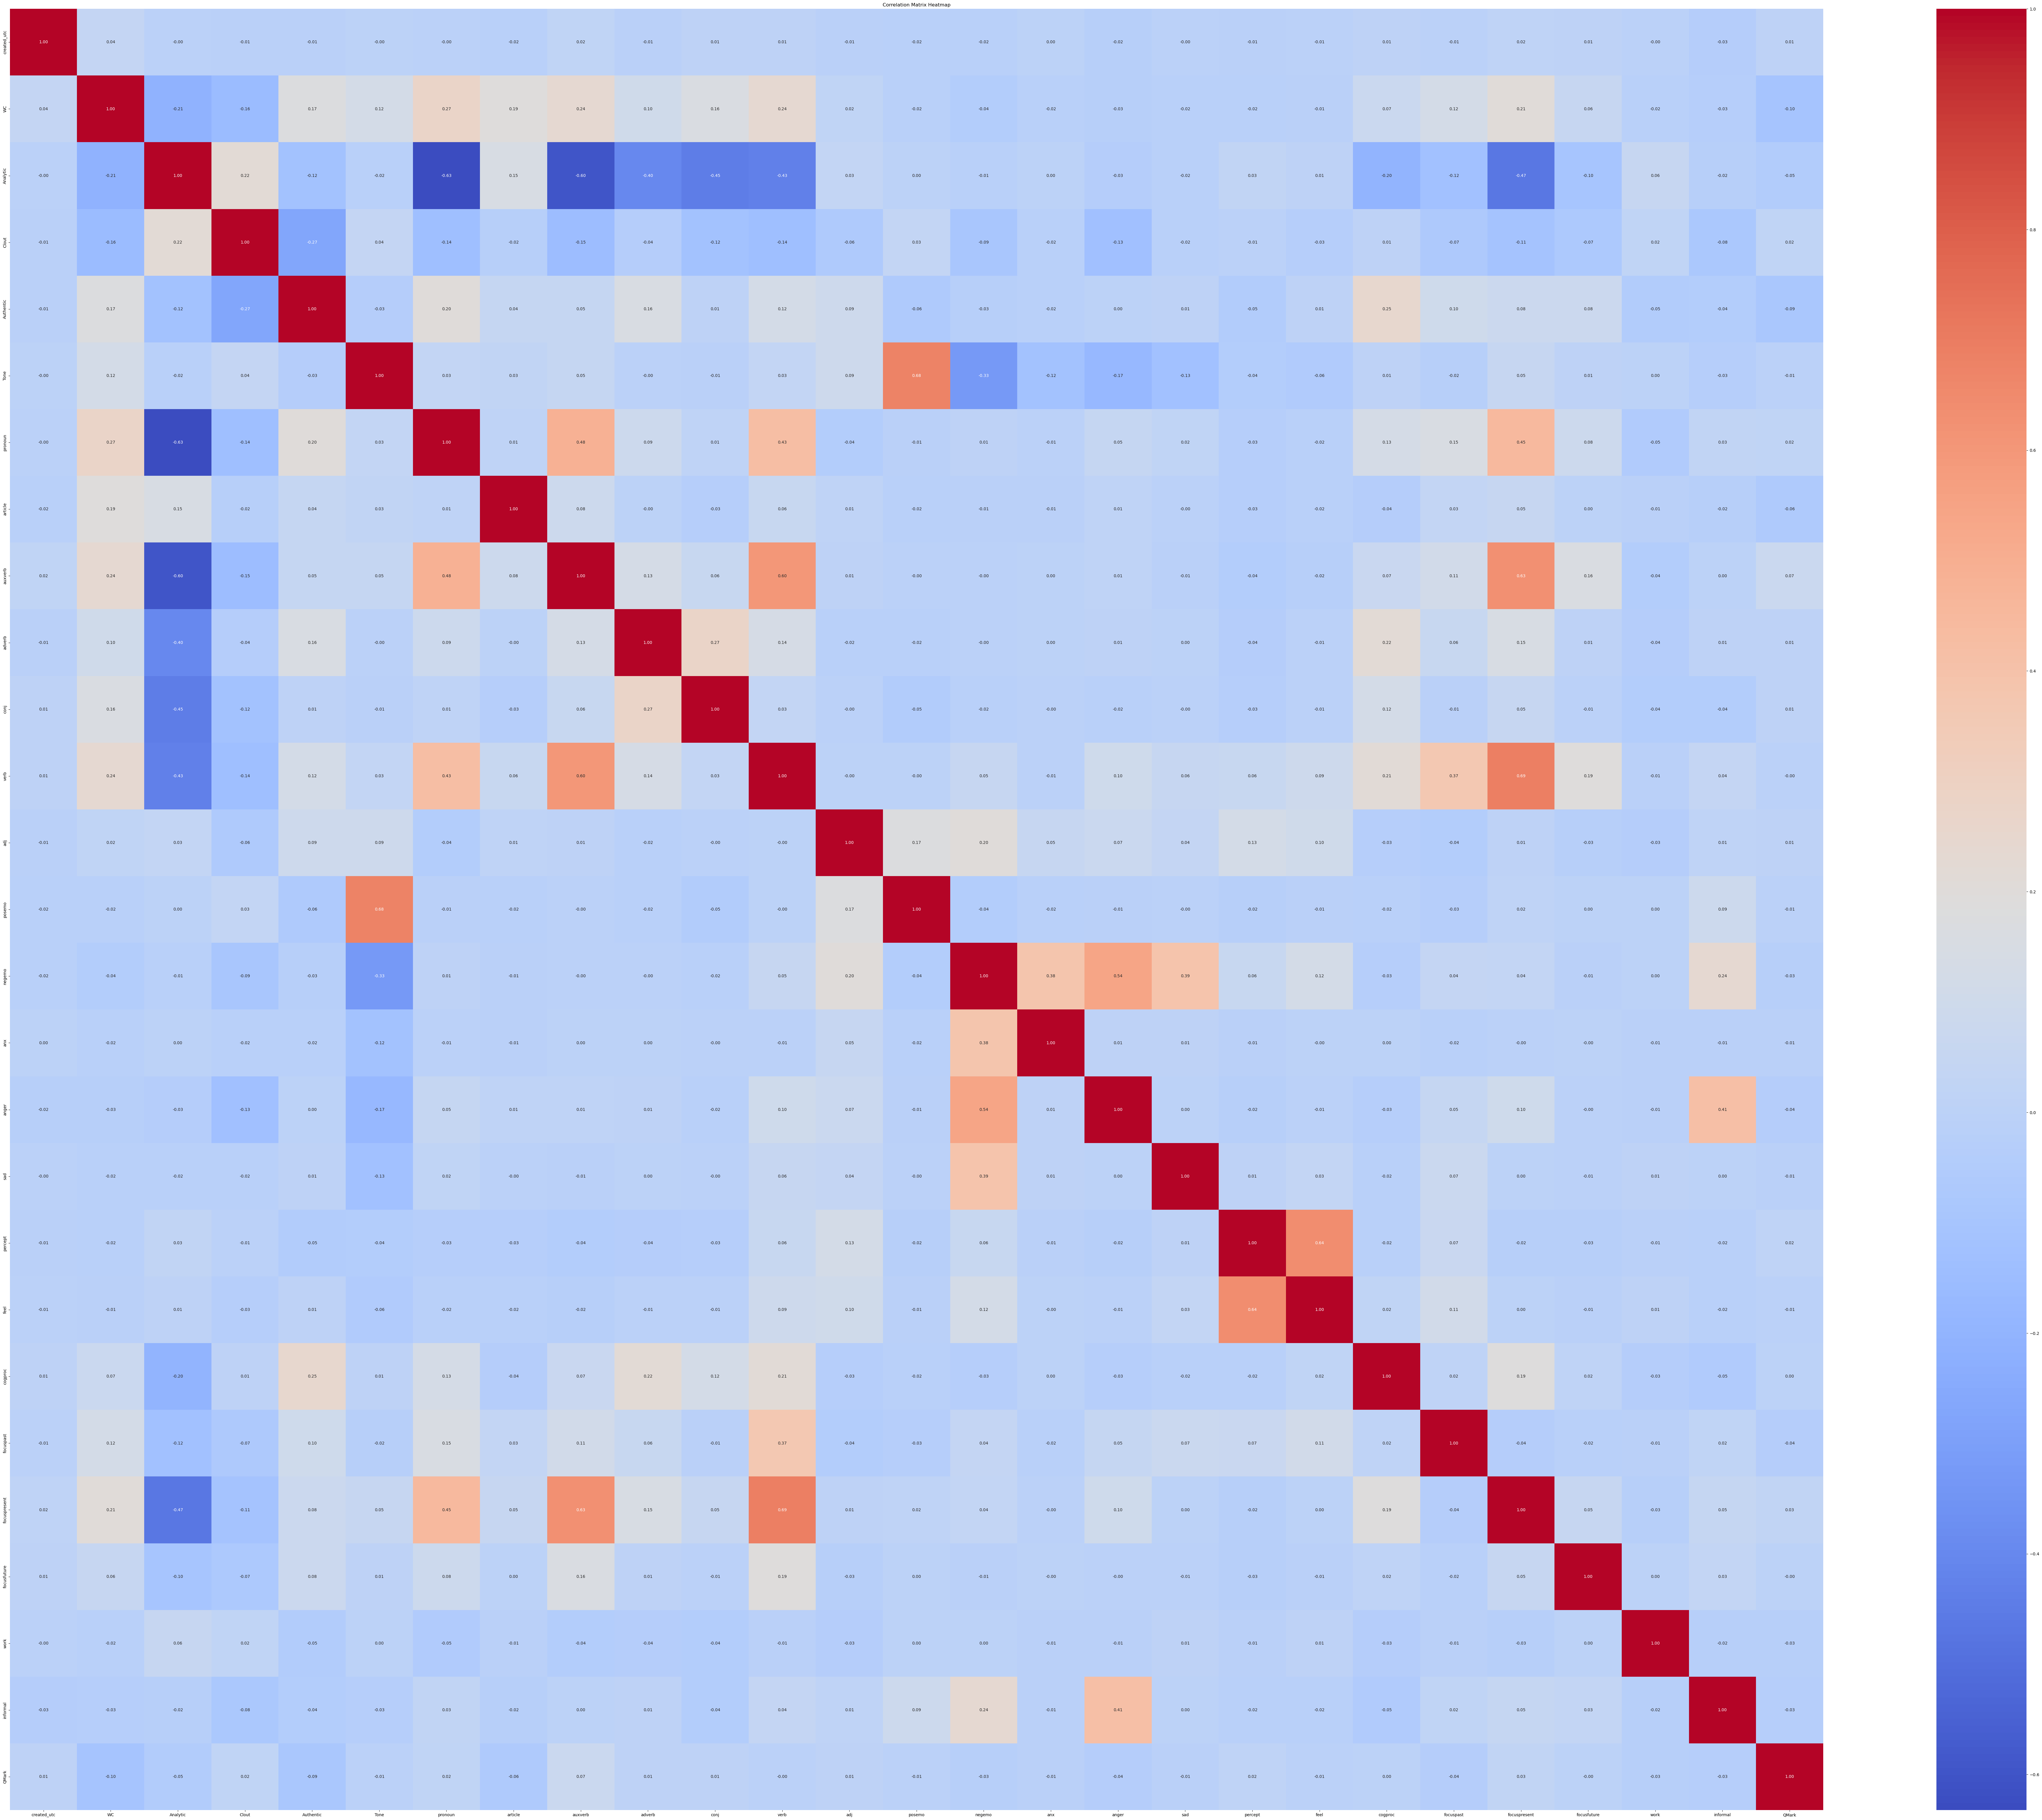

In [422]:
#only using numerical values for heatmap 

numerical_df_submissions = df_submissions.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numerical_df_submissions.corr()

plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


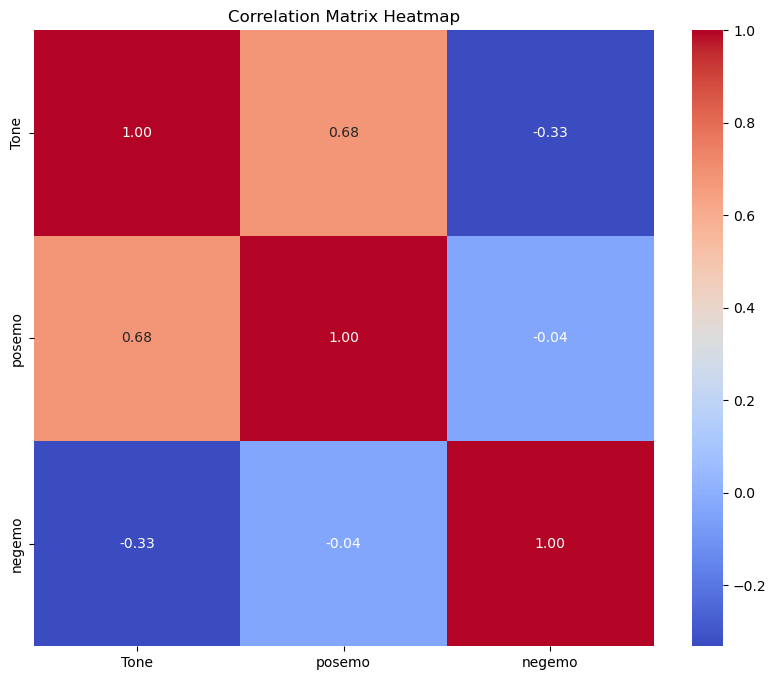

In [427]:
df_emo = df_submissions[['Tone','posemo','negemo']]

correlation_matrix = df_emo.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [424]:
#Converting created_utc to date time and year columns 
def extract_datetime(row):
    timestamp = row['created_utc']
    dt_object = datetime.datetime.fromtimestamp(timestamp)
    return dt_object
    

# Applying the function to each row in the DataFrame and creating a new column
df_submissions['Datetime'] = df_submissions.apply(extract_datetime, axis=1)
df_comments['Datetime'] = df_submissions.apply(extract_datetime, axis=1)

# Dropping the 'created_utc' column
df_submissions.drop('created_utc', axis=1, inplace=True)
df_comments.drop('created_utc', axis=1, inplace=True)

# Inserting the 'Datetime' column
datetime_column_submission = df_submissions.pop('Datetime')
datetime_column_comment = df_comments.pop('Datetime')

df_submissions.insert(2, 'Datetime', datetime_column_submission)
df_comments.insert(1, 'Datetime', datetime_column_comment)

# Define the bins for the seasons based on days of the year
seasons_bins = [0, 80, 172, 264, 355, 366]
seasons_labels = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']

df_submissions['season'] = pd.cut(df_submissions['Datetime'].dt.dayofyear, bins=seasons_bins, labels=seasons_labels, ordered=False)
df_comments['season'] = pd.cut(df_comments['Datetime'].dt.dayofyear, bins=seasons_bins, labels=seasons_labels, ordered=False)

df_submissions.insert(3, 'season', df_submissions.pop('season'))
df_comments.insert(2, 'season', df_comments.pop('season'))

In [425]:
df_comments

,author,Datetime,season,score,WC,Analytic,Clout,Authentic,Tone,WPS,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,BoofDontShoot,2022-07-28 23:50:15,Summer,1,5,8.69,50.00,1.00,25.77,2.50,...,0.0,0.00,0.00,0.00,20.00,0.00,20.00,0.00,0.0,0.0
1,Busy_Background_195,2022-07-28 23:22:43,Summer,1,55,32.58,13.76,14.10,1.00,13.75,...,0.0,0.00,0.00,1.82,7.27,3.64,1.82,0.00,0.0,0.0
2,Wolf_Double,2022-07-28 23:06:11,Summer,1,6,1.00,95.20,23.51,99.00,6.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,Knowagoraaa,2022-07-28 22:49:43,Summer,1,39,71.92,60.13,99.00,73.64,13.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,Busy_Background_195,2022-07-28 22:21:57,Summer,1,75,24.37,29.68,14.56,2.41,25.00,...,0.0,0.00,0.00,0.00,2.67,1.33,1.33,1.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014392,Virgowitch,NaT,NaN,2,5,1.00,50.00,43.37,99.00,5.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1014393,DrewSkii1010,NaT,NaN,1,9,99.00,13.32,58.07,99.00,9.00,...,0.0,11.11,0.00,0.00,11.11,0.00,11.11,0.00,0.0,0.0
1014394,erischilde,NaT,NaN,1,104,7.27,89.42,63.54,43.27,10.40,...,0.0,0.00,0.00,0.00,2.88,1.92,0.00,0.00,0.0,0.0
1014395,dingobaybees,NaT,NaN,3,44,4.01,91.35,85.21,25.77,11.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [426]:
df_submissions.head()

,author,title,Datetime,season,score,WC,Analytic,Clout,Authentic,Tone,...,sad,percept,feel,cogproc,focuspast,focuspresent,focusfuture,work,informal,QMark
0,Odd-Pizza-1079,How much tylenol is too much? Asking for a fri...,2022-07-28 23:50:15,Summer,1,12.0,18.82,79.76,1.79,25.77,...,0.0,0.0,0.0,16.67,0.0,16.67,0.0,0.00,0.0,8.33
1,Global_Face_4708,Gabapentin/Lyrica/Clonidine Through Telehealth?,2022-07-28 23:22:43,Summer,1,5.0,99.00,50.00,1.00,25.77,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,20.00
2,Bluebeamtwinfn,Opiates prolonging finish/enhancing sex,2022-07-28 23:06:11,Summer,1,5.0,93.26,50.00,43.37,25.77,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
3,iLoveLuckiii,Boost your oxy high! &amp; Save money! (USE ON...,2022-07-28 22:49:43,Summer,1,13.0,82.82,93.79,94.81,99.00,...,0.0,0.0,0.0,7.69,0.0,15.38,0.0,0.00,0.0,0.00
4,Downtown_Syrup4635,IOP Detox while working 9-5??,2022-07-28 22:21:57,Summer,1,6.0,62.04,50.00,23.51,25.77,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,16.67,0.0,33.33
